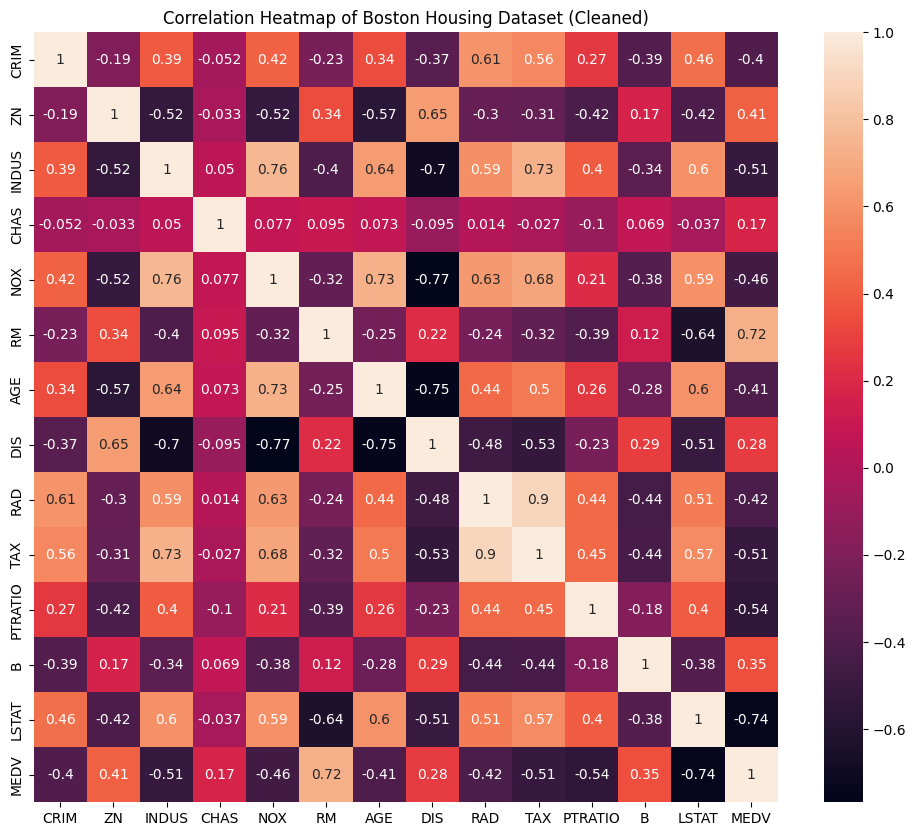

Accuracy: 0.9367088607594937


C:\Users\shubh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


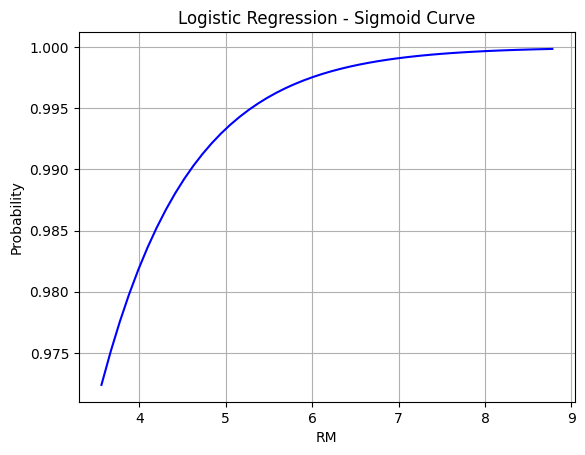

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\HousingData.csv")

# Clean BOTH features and target - remove rows with NaN in ANY column
df = df.dropna()

# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap of Boston Housing Dataset (Cleaned)")
plt.show()

# Prepare features and target from CLEANED data
x = df.drop(['CHAS'], axis=1).values
y = df['CHAS'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
ypred = model.predict(X_test)
accuracy = accuracy_score(y_test, ypred)

print("Accuracy:", accuracy)

x_values = np.linspace(df['RM'].min(), df['RM'].max())

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_values = sigmoid(x_values)

plt.plot(x_values, y_values, color='blue')
plt.xlabel('RM')
plt.ylabel('Probability')
plt.title('Logistic Regression - Sigmoid Curve')
plt.grid(True)
plt.show()
